# TP1  Algorithmique Numérique pour l’Optimisation 

## Moindres carrés linéaires 

In [193]:
import autograd as ag
import autograd.numpy as np
import matplotlib.pyplot as plt

### Question 01:

In [107]:
# les paramètre à estimer
param=np.array([0.5, -2, 1, 7]) 
# le nombre de paramètres
m = 4 
#Tx = np.array ([-1.1, 0.17, 1.22, -.5, 2.02, 1.81])
Tx = np.array ([-1.1, -.5, 0.17, 1.22, 1.81, 2.02])
p = Tx.shape[0]

In [108]:
def f(x, param): 
  alpha, beta, gamma, mu  = param[0],param[1], param[2],param[3]
  return (alpha*(x**3))+(beta*(x**2))+(gamma*x)+mu


In [109]:
Ty_sur_la_courbe = np.array ([f(x,param) for x in Tx])
perturbations = 0.5*np.array ([-1.3, 2.7, -5, 0, 1.4, 6])
Ty_experimentaux = Ty_sur_la_courbe + perturbations

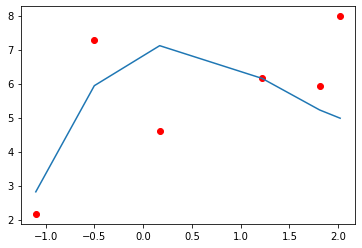

In [117]:
#  affichage des courbe
plt.plot(Tx,Ty_sur_la_courbe)
plt.scatter(Tx, Ty_experimentaux, color ="red")
plt.show() 


In [111]:
# le calcul de l'erreur entre les points experimentaux et les points de la courbe: 
erreur_initial = np.linalg.norm(Ty_sur_la_courbe-Ty_experimentaux, 2)
erreur_initial

4.240872551728005

In [118]:
# construire le système d'equation linéaire  Ax=b: 

# x: les m paramètre qu'on cherche à estimer:
x = param

# A: les abscisses des points expérimentaux:
A = np.array([[x**3, x**2,x, 1]  for x in  Tx])

# b: les cordonnéee des points expérimentaux:
b = Ty_experimentaux

# la résolution du système linéaire: 
x_optimal = np.linalg.solve(np.dot(A.T ,A),np.dot(A.T,b))
print("les paramètre optimaux sont : \n",x_optimal)


les paramètre optimaux sont : 
 [ 1.30559189 -2.0506343  -0.44700354  6.3250968 ]


In [119]:
# le calcul des nouvelles ordonnées: 
Ty_sur_la_courbe_après_estimation = np.array ([f(x,x_optimal) for x in Tx])

# le calcul de l'erreur apères estimation des paramètre: 
erreur_après_estimation = np.linalg.norm(Ty_sur_la_courbe-Ty_sur_la_courbe_après_estimation, 2)
print("l'erreur après estimation des paramètre :", erreur_après_estimation,"\n") 
print("l'erreur apèrs estimation est-elle inférieure à l'erreur initaile ?", erreur_après_estimation<erreur_initial, "\n ")




l'erreur après estimation des paramètre : 3.4319196000079804 

l'erreur apèrs estimation est-elle inférieure à l'erreur initaile ? True 
 


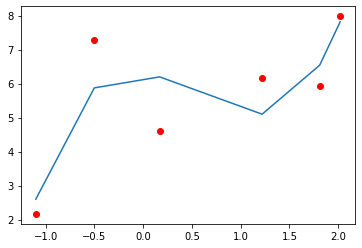

In [121]:
#  affichage des courbe après estimation des paramètre: 
plt.plot(Tx, Ty_sur_la_courbe_après_estimation)
plt.scatter(Tx, Ty_experimentaux, color = 'red')
plt.show() 

# Méthode de Newton en une variable

## Question 02: 

Danc cette question on cherche à calculer les premiers termes d’une suite (un) qui tende vers $\sqrt[3]{2}$ à partir d’un polynôme à coefficients entiers.

pour cela on définie la fonction f(x) = $x^3$-2 et on applique l'algorithme de newton pour trouver la racine de f i.e x tel que f(x)=0

In [150]:
def fonction(x):
  """
  la fonction qui calcul le polynome à coefficients entière pour approcher sqrt(2,3)
  x: le paramètre
  """
  return x**3 - 2 

def derivee(x):
  """
  calcul la dérivée de notre fonction (x**3 - 2) en x
  """
  return 3*(x**2) 

def algo_newton(n, u0): 
  """
  permet de calculer une suite de terme (Un) qui tend vers sqrt(2,3)
  les paramètre: 
      n: le nombre d'ittération qu'on veut
      u0: le terme u0 de la suite à calculer
  renvoie: res: la liste qui va stocker les n premier terme de la suit (Un)
  """ 
  res = [u0] 
  u = u0

  for i in range(n): 
      u = u - (fonction(u)/derivee(u))
      res.append(u)
  return res



In [151]:
print(algo_newton(10, 1))

[1, 1.3333333333333333, 1.2638888888888888, 1.259933493449977, 1.2599210500177698, 1.2599210498948732, 1.2599210498948732, 1.2599210498948732, 1.2599210498948732, 1.2599210498948732, 1.2599210498948732]


## Question 03 

Dans cette question, on cherche le minimum local de la premiere fonction de ce tp. Les points stationnaire vérifient f'(x)=0, donc l'idée est d'appliquer l'algorithme de newton sur la fonction dérivée. 

In [145]:
param = np.array([1.5870106105525719, -3.1447447637103476, -0.37473299354311346, 7.484053576868045])

In [154]:
def derivee_f(x, param):
  """
  calcul la dérivée de notre fonction (alpha*(x**3))+(beta*(x**2))+(gamma*x)+mu en x
  """

  alpha, beta, gamma, mu  = param[0],param[1], param[2],param[3]
  return alpha*3*(x**2)+beta*2*x+gamma

def derivee2_f(x,param):
  """
  calcul la dérivée seconde de notre fonction (alpha*(x**3))+(beta*(x**2))+(gamma*x)+mu en x
  """

  alpha, beta, gamma, mu  = param[0],param[1], param[2],param[3]
  return alpha*6*x+beta*2


def algo_newton_f_prime(n, u0, param): 
  """
  permet de retrouver le minimum local de la fonction f (écrite au tout debut du tp)
  les paramètre: 
      n: le nombre d'ittération qu'on veut
      u0: le terme u0 de la suite à calculer
      param: les paramètres optimaux  de la fonctio cubique
  renvoie: res: la liste qui va stocker les n premier terme de la suit (Un)
  """ 
  res = [u0] 
  u = u0

  for i in range(n): 
      u = u - (derivee_f(u,param)/derivee2_f(u,param))
      res.append(u)
  return res





In [159]:
min_local = algo_newton_f_prime(1000, 1,param)[-1]
print("le minimum local est : (",min_local,",",f(min_local,param),")")

le minimum local est : ( 1.378146707233452 , 5.148836521795893 )


## Question 04 


Ici on réecrie newton en utilisant les fonction grad et hessian de autograd

In [198]:
def algo_newton_autograd(n, u0, param): 
  """
  permet de retrouver le minimum local de la fonction f (écrite au tout debut du tp) en utilisant les fonction grad et hessain de autograd
  les paramètre: 
      n: le nombre d'ittération qu'on veut
      u0: le terme u0 de la suite à calculer
      param: les paramètres optimaux de la fonction cubique
  renvoie: res: la liste qui va stocker les n premier terme de la suit (Un)
  """ 
  res = [u0] 
  u = u0
  derivee_f = ag.grad(f)
  derivee2_f  = ag.hessian(f)


  for i in range(n): 
      u = u - (derivee_f(u,param)/derivee2_f(u,param))
      res.append(u)
  return res


In [199]:
min_local = algo_newton_autograd(1000, 1.,param)[-1]
print("le minimum local est : (",min_local,",",f(min_local,param),")")


le minimum local est : ( 1.378146707233452 , 5.148836521795893 )
